In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [3]:
df = pd.read_excel("Signal.xlsx")
df['EndDate'] = pd.to_datetime(df['EndDate'])
df['StartDate'] = pd.to_datetime(df['StartDate'])
df['End'] = pd.to_datetime(df['End'], dayfirst=True)
df['Start'] = pd.to_datetime(df['Start'],dayfirst=True)
df['Duration'] = df['End'] - df['Start']
df.head()

,Signal,StartDate,StartTime,EndDate,EndTime,Start,End,Duration
0,Yellow,1998-04-12,05:15:00,1998-04-12,08:00:00,1998-04-12 05:15:00,1998-04-12 08:00:00,02:45:00
1,Yellow,1998-04-26,21:15:00,1998-04-26,21:50:00,1998-04-26 21:15:00,1998-04-26 21:50:00,00:35:00
2,Red,1998-04-26,21:50:00,1998-04-27,04:00:00,1998-04-26 21:50:00,1998-04-27 04:00:00,06:10:00
3,Yellow,1998-04-27,04:00:00,1998-04-27,05:45:00,1998-04-27 04:00:00,1998-04-27 05:45:00,01:45:00
4,Yellow,1998-05-02,16:20:00,1998-05-02,17:50:00,1998-05-02 16:20:00,1998-05-02 17:50:00,01:30:00


In [4]:
#count each year
year_count = df['StartDate'].groupby(df['StartDate'].dt.year).count()
year_count = year_count.to_frame(name=None)
year_count.columns = ["Times"]
year_count['Year'] = year_count.index
year_count['Year'] = year_count['Year'].astype(str) + "-01-01"
year_count['Year'] = pd.to_datetime(year_count['Year'], yearfirst=True)
year_count

,Times,Year
StartDate,,
1998,28,1998-01-01
1999,27,1999-01-01
2000,40,2000-01-01
2001,50,2001-01-01
2002,22,2002-01-01
2003,18,2003-01-01
2004,19,2004-01-01
2005,17,2005-01-01
2006,39,2006-01-01


<IPython.core.display.Javascript object>


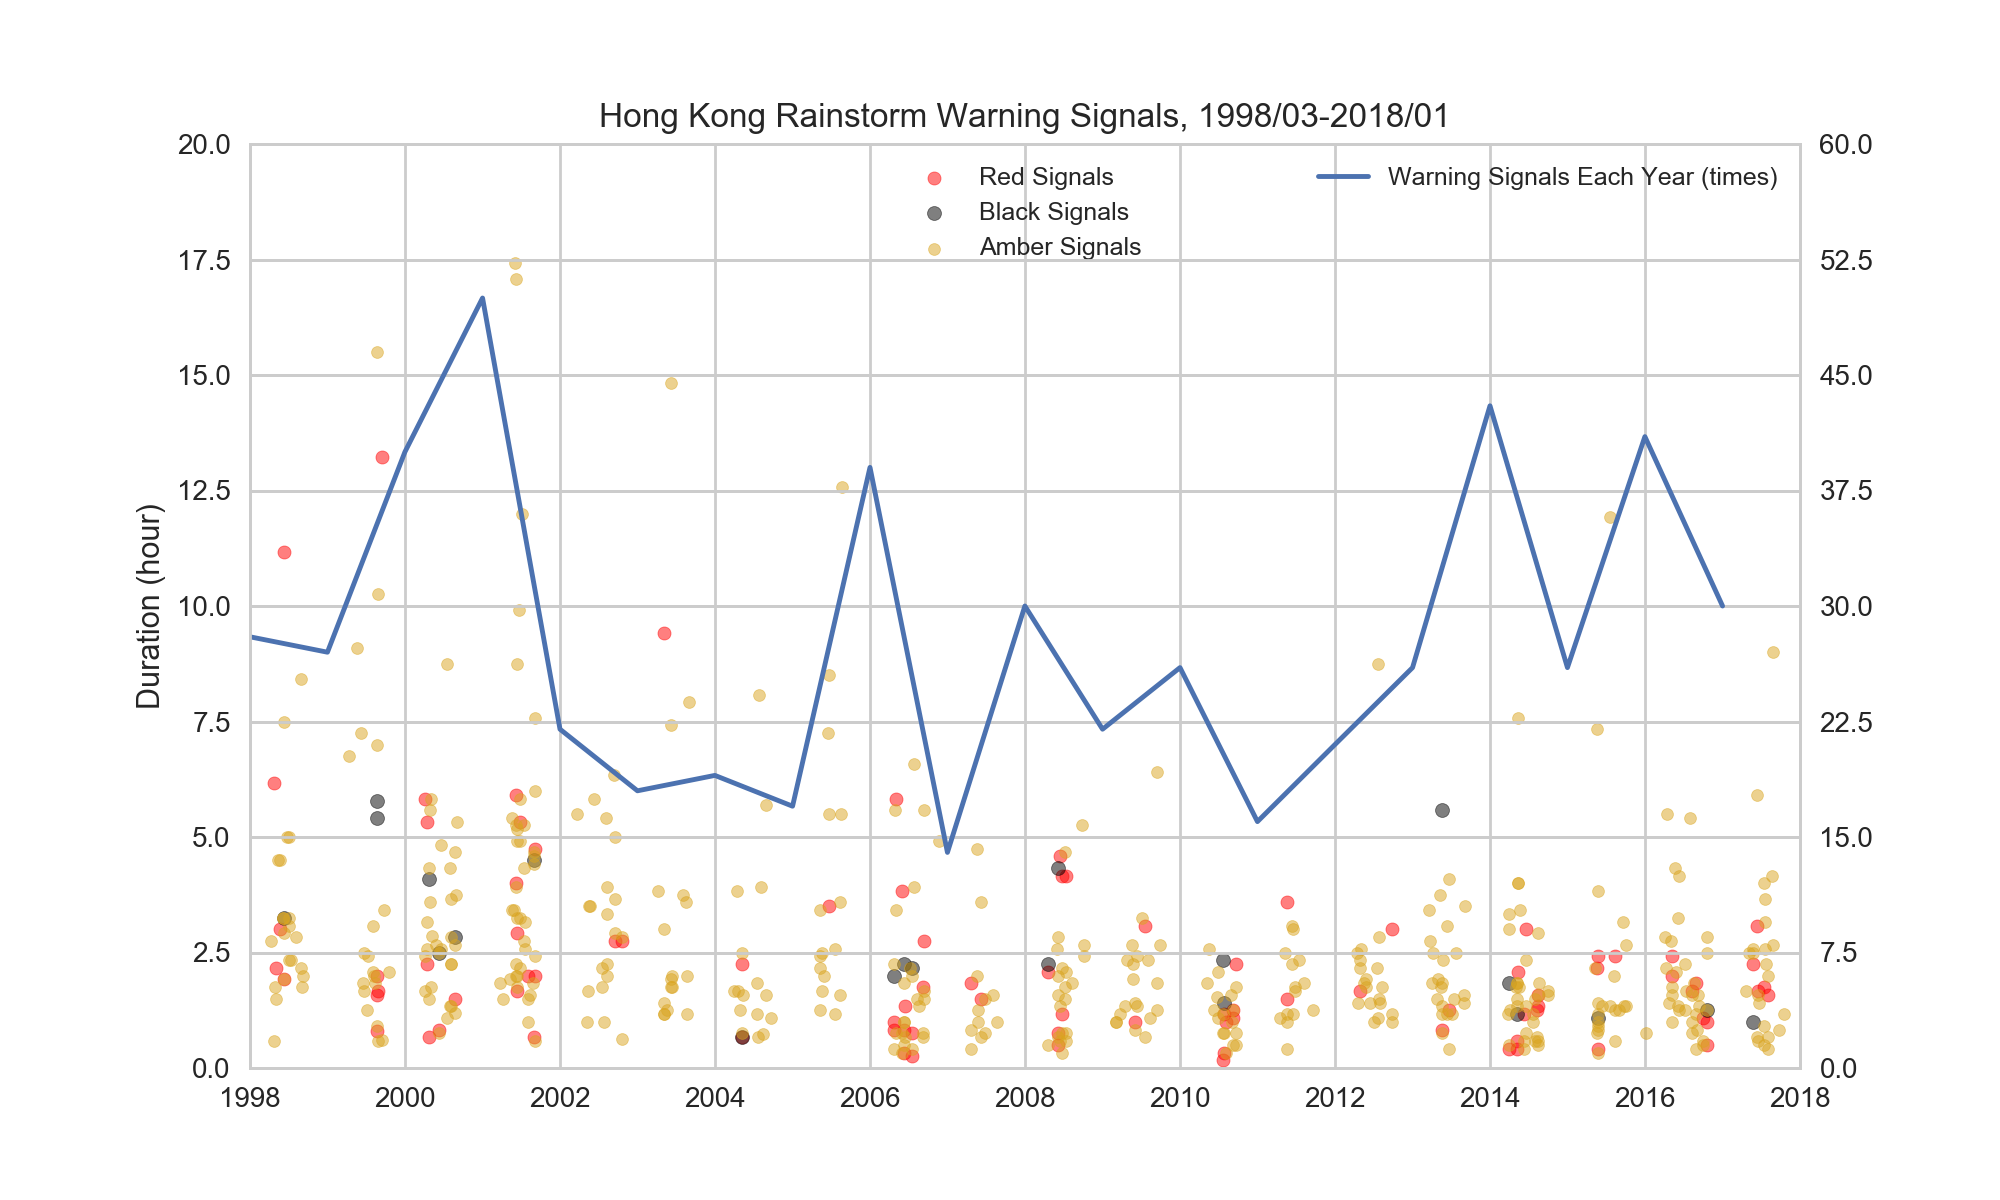

In [7]:
sns.set(style="whitegrid")
df_red = df[df['Signal'] == 'Red']
df_black = df[df['Signal'] == 'Black']
df_amber = df[df['Signal'] == 'Yellow']
plt.figure(figsize=(10, 6))

plt.scatter(df_red['StartDate'].values.astype('datetime64[D]'), df_red['Duration'] / np.timedelta64(1, 'h'), c='red', s=22, alpha=0.5, label="Red Signals");
plt.scatter(df_black['StartDate'].values.astype('datetime64[D]'), df_black['Duration'] / np.timedelta64(1, 'h'), c='black', s=25, alpha=0.5, label="Black Signals");
plt.scatter(df_amber['StartDate'].values.astype('datetime64[D]'), df_amber['Duration'] / np.timedelta64(1, 'h'), c='goldenrod', s=18, alpha=0.5, label="Amber Signals");

plt.ylim( (0, 20) );
plt.ylabel("Duration (hour)");

ax = plt.gca();
ax.axis([pd.Timestamp('1998'), pd.Timestamp('2018'), 0, 20])
ax.legend(loc="upper center", frameon=False, prop={'size': 9})
plt.title("Hong Kong Rainstorm Warning Signals, 1998/03-2018/01");

ax2 = ax.twinx();
ax2.plot(year_count['Year'].values.astype('datetime64[D]'),year_count['Times'], label="Warning Signals Each Year (times)");
ax2 = plt.gca();
ax2.axis([pd.Timestamp('1998'), pd.Timestamp('2018'), 0, 60]);
ax2.legend(loc=1, frameon=False, prop={'size': 9});

ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax.get_yticks())));
